# Seeds dataset (Clustering)

## Authors

Written by: Neeraj Asthana (under Professor Robert Brunner)

University of Illinois at Urbana-Champaign

Summer 2016

## Acknowledgements

Dataset found on UCI Machine Learning repository at: https://archive.ics.uci.edu/ml/datasets/seeds

## Dataset Information

This data set tries to cluster seeds (type) using many different continous predcitors.

A description of the dataset can be found at: https://archive.ics.uci.edu/ml/datasets/seeds

Predictors:

- area A
- perimeter P
- compactness C = 4*pi*A/P^2
- length of kernel
- width of kernel
- asymmetry coefficient 
- length of kernel groove

In [2]:
#Libraries and Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [6]:
#Names of all of the columns
names = [
       'area'
    ,  'perimeter'
    ,  'compactness'
    ,  'length'
    ,  'width'
    ,  'asymmetry'
    ,  'length'
    ,  'class'
]

#Import dataset
data = pd.read_csv('seeds_dataset.txt', sep = '\t', header = None, names = names)

data.head()

,area,perimeter,compactness,length,width,asymmetry,length,class
0,15.26,14.84,0.8710,5.220,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,4.956,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,4.825,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,4.805,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.175,3.562,1.355,5.175,1.0


In [4]:
data.shape

(210, 8)

In [8]:
#Drop nas (labelled as ? in this dataset) -> dropped 6 rows
#data_clean=data.applymap(lambda x: np.nan if x == '?' else x).dropna()
data_clean = data.dropna()

data_clean.shape

(199, 8)

In [39]:
#Select Predictor columns
X = data_clean[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', "origin"]]

#Select target column
y = data_clean['mpg']

In [56]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [57]:
#Train a simple linear regression model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

#Print coefficients
list(zip(names[1:8], regr.coef_))

[('cylinders', -0.44780992748457576),
 ('displacement', 0.020278830009325951),
 ('horsepower', -0.024307678410886283),
 ('weight', -0.0062621625124574583),
 ('acceleration', 0.07582477840381352),
 ('model_year', 0.72938384661765776),
 ('origin', 1.3155182530109999)]

In [58]:
#Mean Squared error and R-squared on the training set
preds = regr.predict(X_train)
mse = np.mean((preds - y_train) ** 2)
rsq = regr.score(X_train, y_train)

print("Mean Squared Error: %.4f \n R-squared: %.4f" % (mse,rsq))

Mean Squared Error: 10.4875 
 R-squared: 0.8233


In [59]:
#Test model on held out test set
#Mean Squared error on the testing set
preds_ = regr.predict(X_test)
mse_ = np.mean((preds_ - y_test) ** 2)
rsq_ = regr.score(X_test, y_test)

print("Mean Squared Error: %.4f \n R-squared: %.4f" % (mse_,rsq_))

Mean Squared Error: 12.4737 
 R-squared: 0.8071


Populating the interactive namespace from numpy and matplotlib


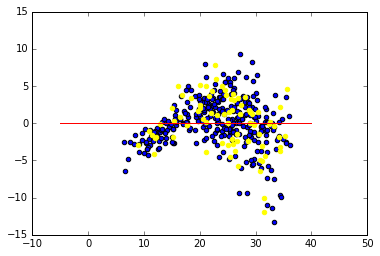

In [60]:
%pylab inline
#Predicted vs. errors plot -> demonstrates an issue with this fit (high bias)
plt.scatter(regr.predict(X_train), regr.predict(X_train)-y_train)
plt.plot([-5,40],[0,0], color = "red")

#place testing data on the plot as well
plt.scatter(regr.predict(X_test), regr.predict(X_test)-y_test, color = "yellow")

## Data Tasks

1. Read in file
    - Different types of separators (',',' ', '\t', '\s', etc.)
    - Specify whether there is a header or not
    - Name different columns
    
1. Handle missing values (ex. ?, NA, etc.)
    - remove these examples?
    - set these values to an arbitrary value like 0 or NA
    - replace missing values with the mean

1. Select columns for the regression tasks
    - Select columns I want to use as predictors
    - Select which column I am looking to target and predict

1. Transform columns or variables
    - create new features from the features we already have (combinations, squaring, cubing, etc.)
    - PCA?
    - scaling?
    
1. Split data into training and testing sets
    - Set a percentage or value for a training or testing set sizes
    - Also create a validation set?
    - Crossvalidation instead?
    
1. Train model using the training data
    - include regularization? (lambda term)
    - specify method (lasso, ridge, simple, SVM, etc.)

1. Perform diagnostics on the model
    - See coefficients
    - See metrics like mean squared error, residual sum of errors, r-squared, etc.

1. Test model on held out testing set
    - See metrics like mean squared error, residual sum of errors, etc.
    
1. Visualizations
    - Visualize dataset as a whole (scatter plot matrix)
    - See diagnostic plots (cooks distances, deviances, predicted vs. actual, etc.)
    - bias or variance issues? 
    
1. Repeat for a new model

